In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

#ignore warnings
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# 여기서 Survival을 예측 해야 한다.

In [5]:
list(df_train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Null Data Check

In [9]:
for col in df_train.columns:
  msg = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:   Survived	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 19.87%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.00%
column:      Cabin	 Percent of Nan value: 77.10%
column:   Embarked	 Percent of Nan value: 0.22%


In [10]:
for col in df_train.columns:
  msg = 'column: {}\t Percent of Nan value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column: Survived	 Percent of Nan value: 0.00%
column: Pclass	 Percent of Nan value: 0.00%
column: Name	 Percent of Nan value: 0.00%
column: Sex	 Percent of Nan value: 0.00%
column: Age	 Percent of Nan value: 19.87%
column: SibSp	 Percent of Nan value: 0.00%
column: Parch	 Percent of Nan value: 0.00%
column: Ticket	 Percent of Nan value: 0.00%
column: Fare	 Percent of Nan value: 0.00%
column: Cabin	 Percent of Nan value: 77.10%
column: Embarked	 Percent of Nan value: 0.22%


In [11]:
for col in df_test.columns:
  msg = 'column: {:>10} \t Percent of NaN value: {:.2f}'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
  print(msg)

column: PassengerId 	 Percent of NaN value: 0.00
column:     Pclass 	 Percent of NaN value: 0.00
column:       Name 	 Percent of NaN value: 0.00
column:        Sex 	 Percent of NaN value: 0.00
column:        Age 	 Percent of NaN value: 20.57
column:      SibSp 	 Percent of NaN value: 0.00
column:      Parch 	 Percent of NaN value: 0.00
column:     Ticket 	 Percent of NaN value: 0.00
column:       Fare 	 Percent of NaN value: 0.24
column:      Cabin 	 Percent of NaN value: 78.23
column:   Embarked 	 Percent of NaN value: 0.00


In [12]:
df_test['Embarked'].shape[0] # 전체 값의 합

418

### MSNO Library이용해서 찾아보기

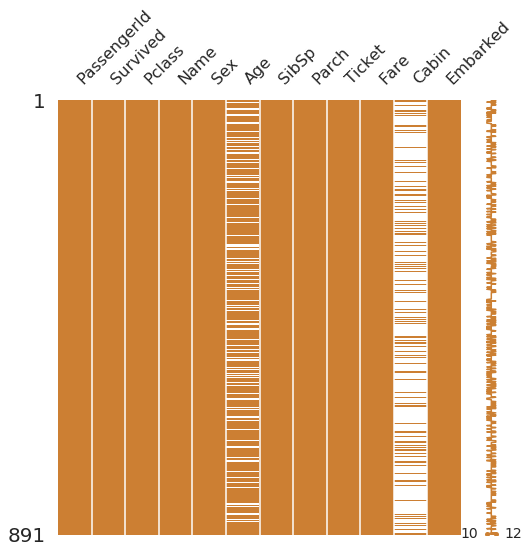

In [13]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))
# color = (R, G, B) # (1, 1, 1)이 흰색

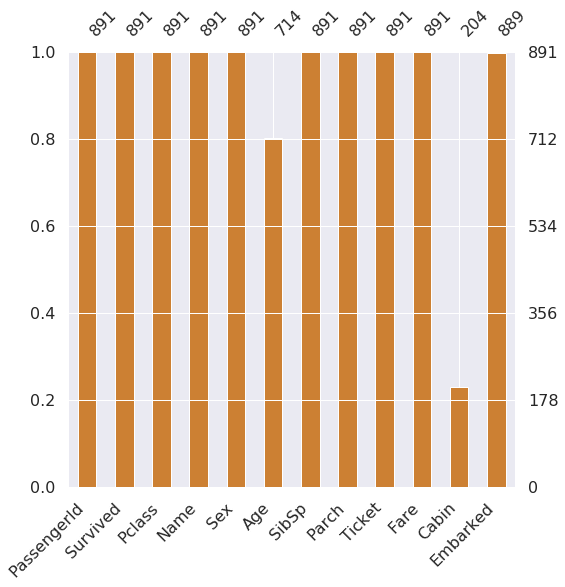

In [14]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

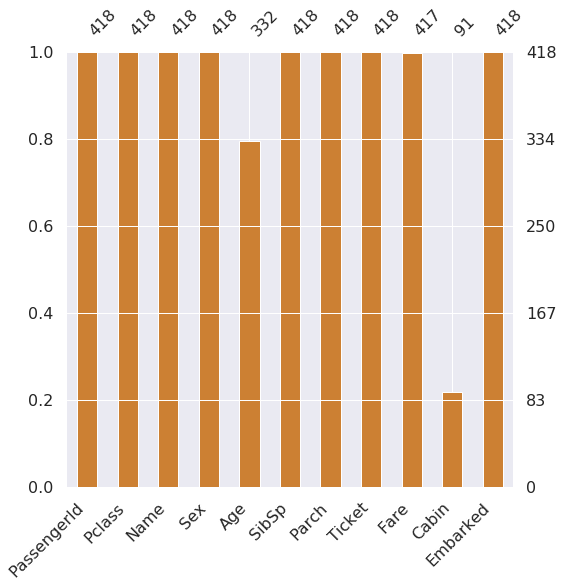

In [15]:
msno.bar(df=df_test.iloc[:, :], figsize=(8,8), color=(0.8, 0.5, 0.2))

### Target label 확인해보기

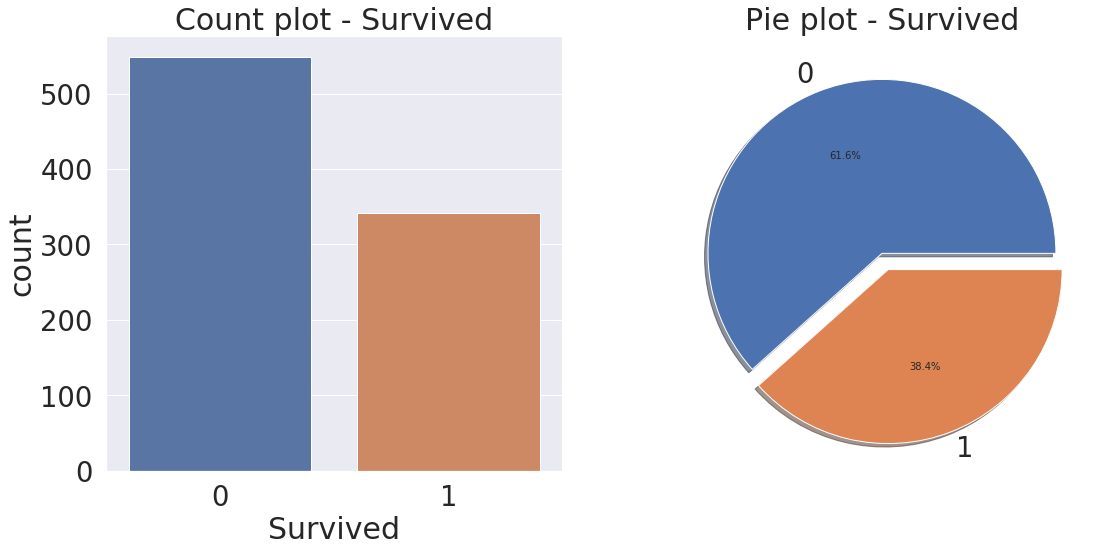

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',
                                            ax=ax[1], shadow=True)

ax[1].set_title('Pie plot - Survived')
ax[1].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[0])
ax[0].set_title('Count plot - Survived')

plt.show()

### Pclass를 기준으로 데이터 분석을 해보겠음

In [17]:
#각 class 에 몇 명 있었는지-
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [18]:
# Survival=1이니, 클라스별 생존한 숫자 만큼 
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [0]:
### Pandas의 crosstab을 사용할 수도 있음

In [20]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [21]:
#margins=False하면 all이 안나오는구나....
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=False).style.background_gradient(cmap='summer_r')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


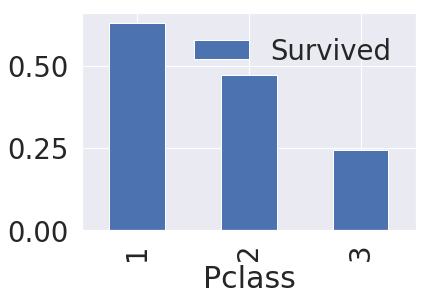

In [22]:
#클래스별 생존률을 한 번 구해보자
#grouped 객체에 mean()을 하게되면 각 클래스별 생존률을 얻을 수 있다. 
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar()

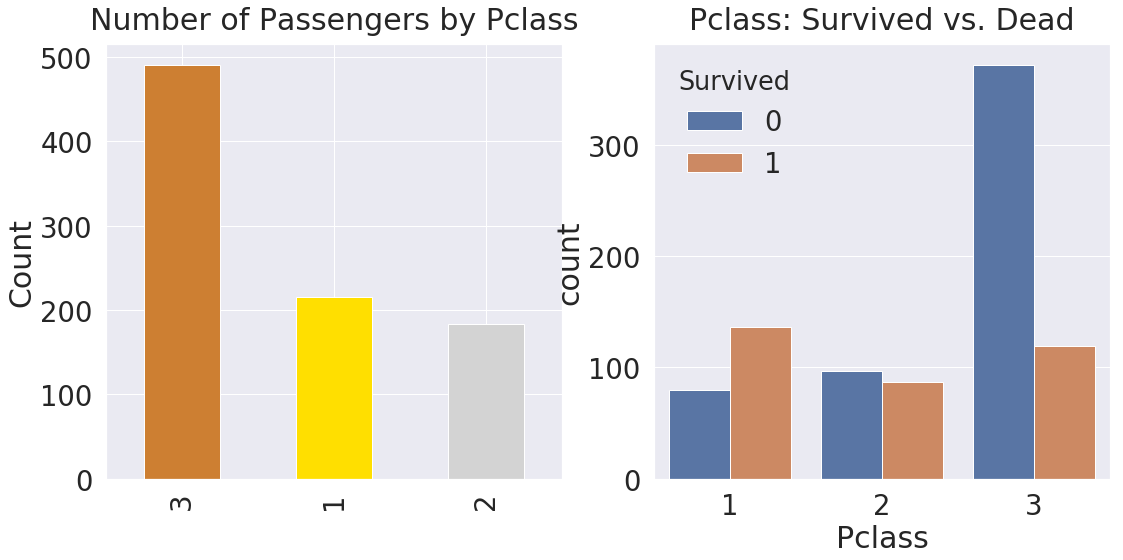

In [23]:
# 예쁘게 seaborn의 coutnplot을 이용해서 그래프를 그려보자

y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)

plt.show()


In [24]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 성별에 따른 생존률을 살펴보기

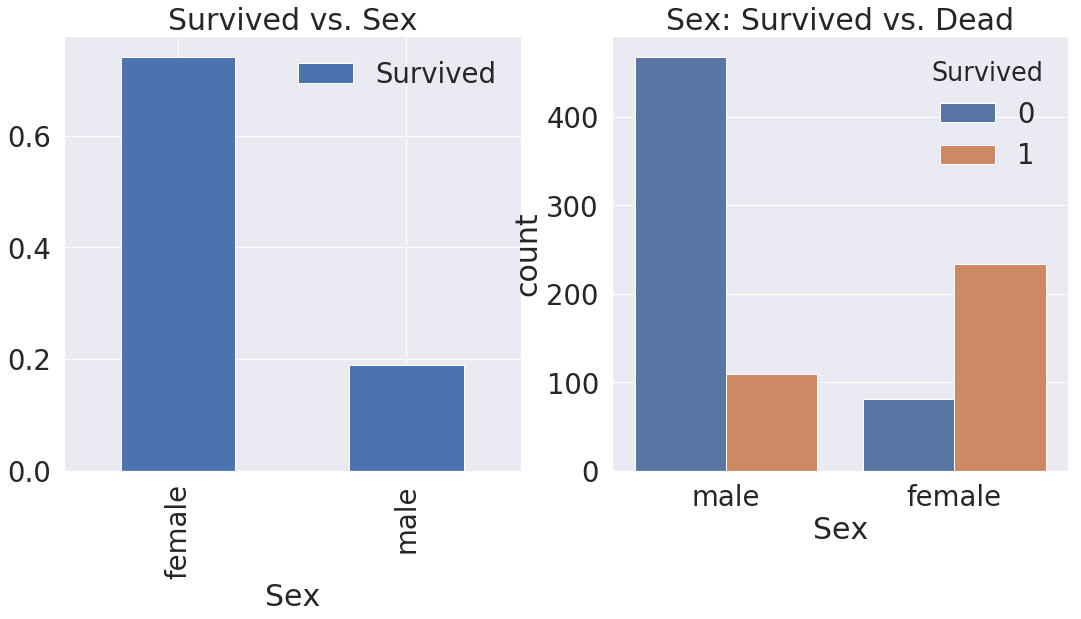

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt.show()

In [26]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Pclass & 성별 모두 따져보기

In [0]:
#seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다.

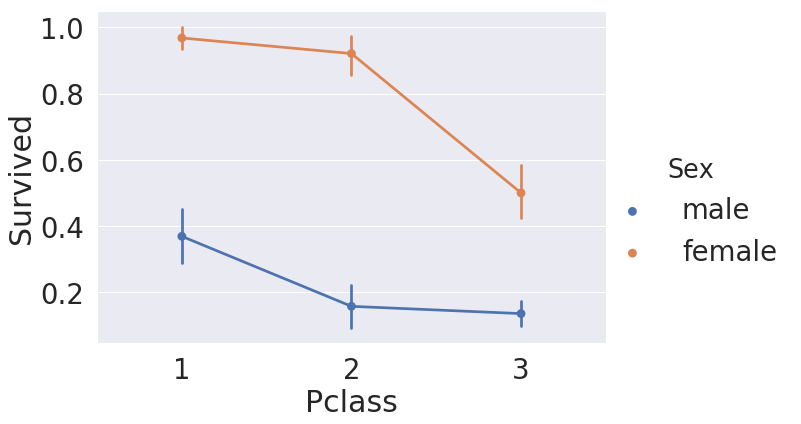

In [29]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

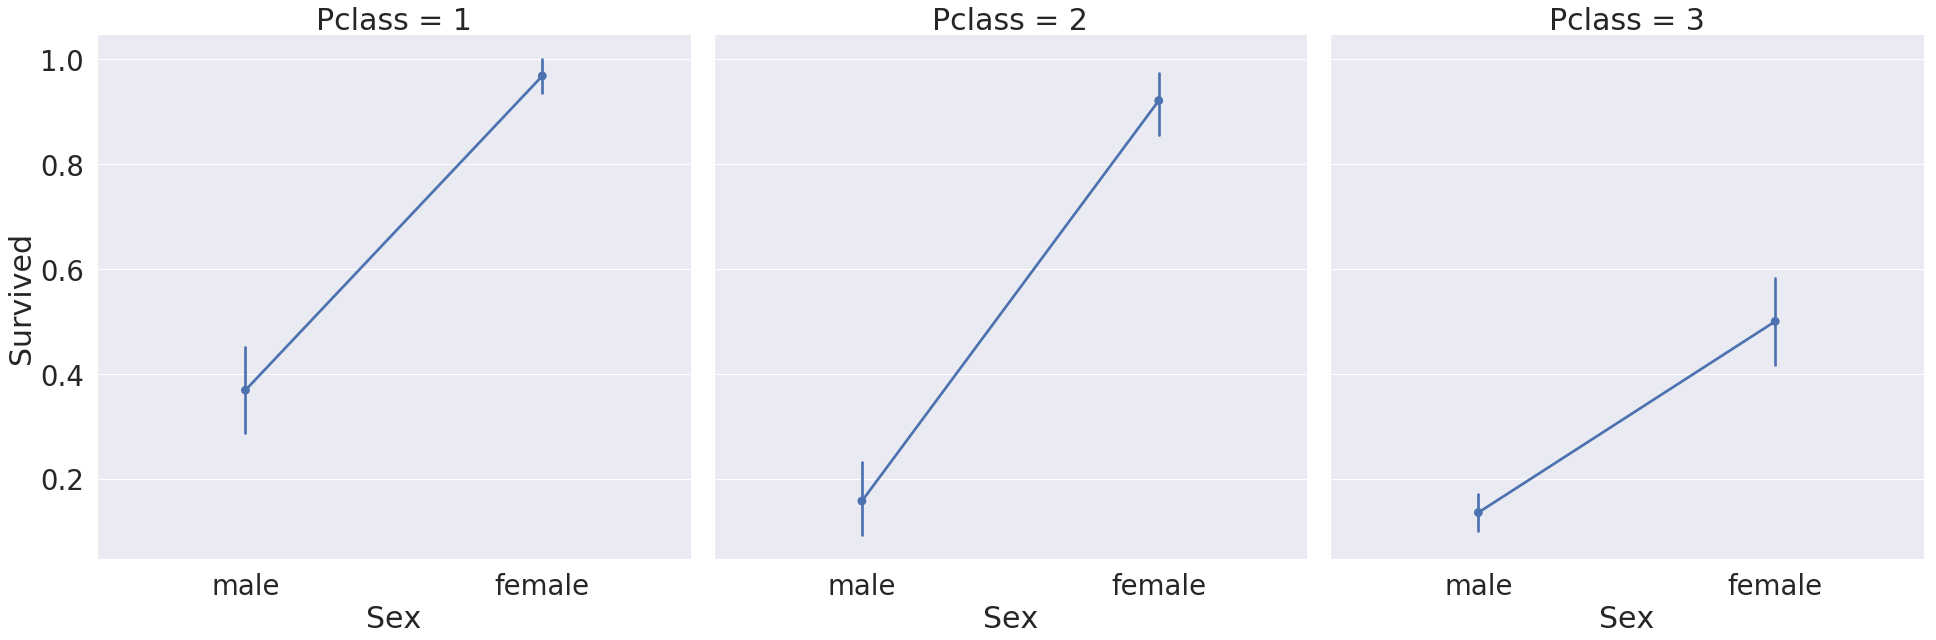

In [30]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data = df_train, satureation=0.5, size=9, aspect=1)

### Age를 살펴보자

In [31]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


In [0]:
# 생존에 따른 Age의 Histogram그려보기

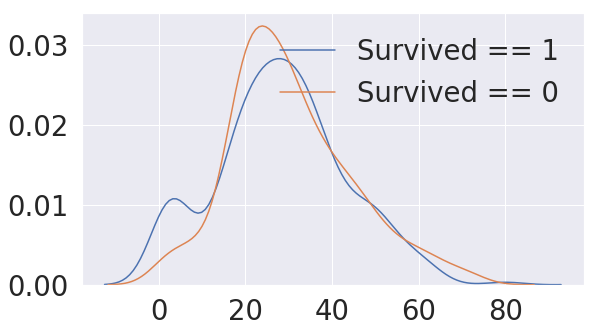

In [33]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

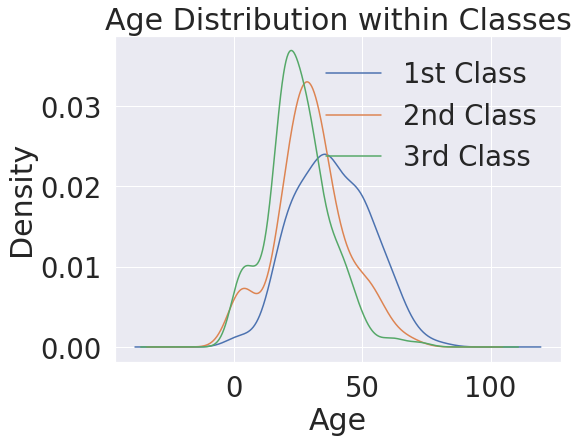

In [34]:
# Age distribution in relation to class

plt.figure(figsize=(8,6))

df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

In [0]:
# 나이대가 변하면서 생존률이 어떻게 변화하는지 살펴보기

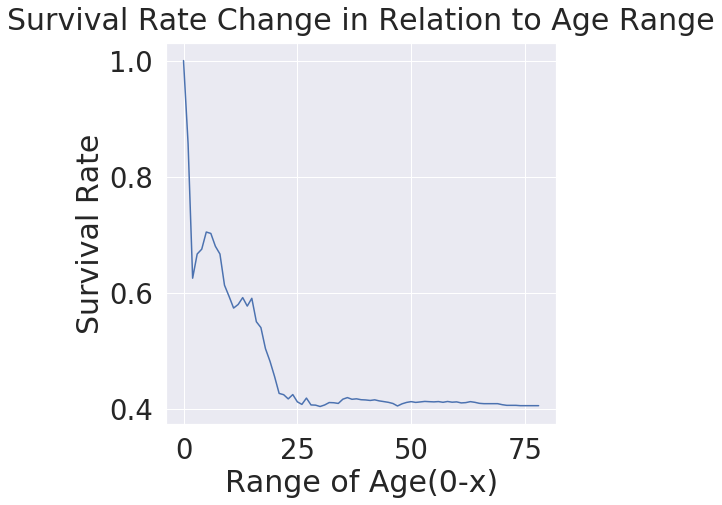

In [36]:
cummulate_survival_ratio = []

for i in range(1,80):
  cummulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
  
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival Rate Change in Relation to Age Range', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

### Pclass ~ Sex ~ Age using Violinplot

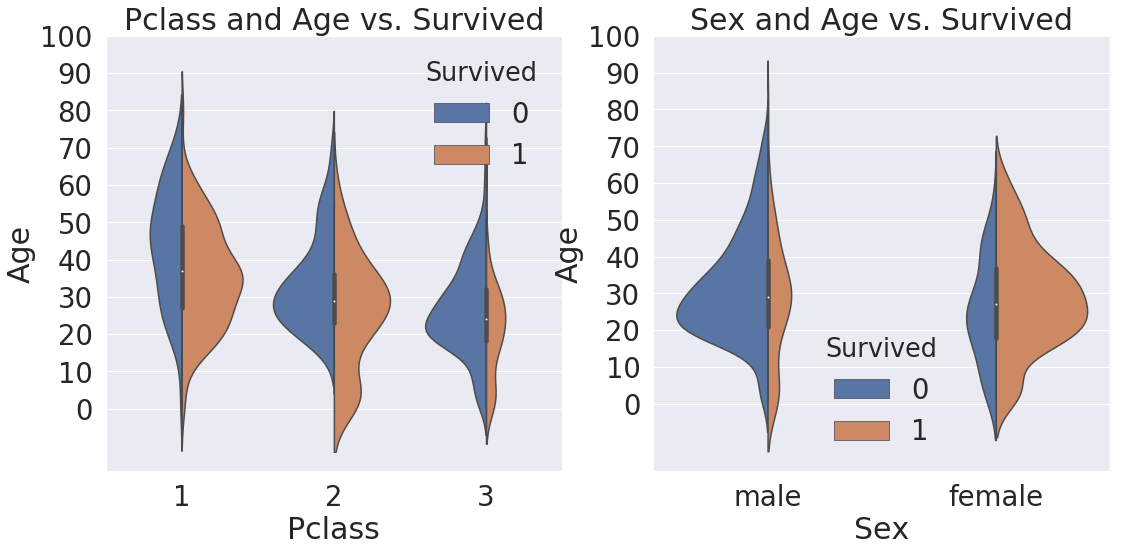

In [37]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

### Embarked

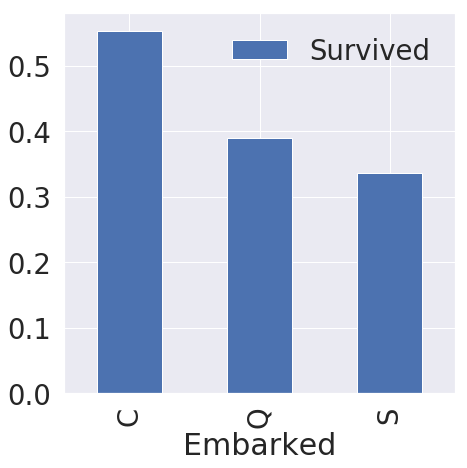

In [38]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

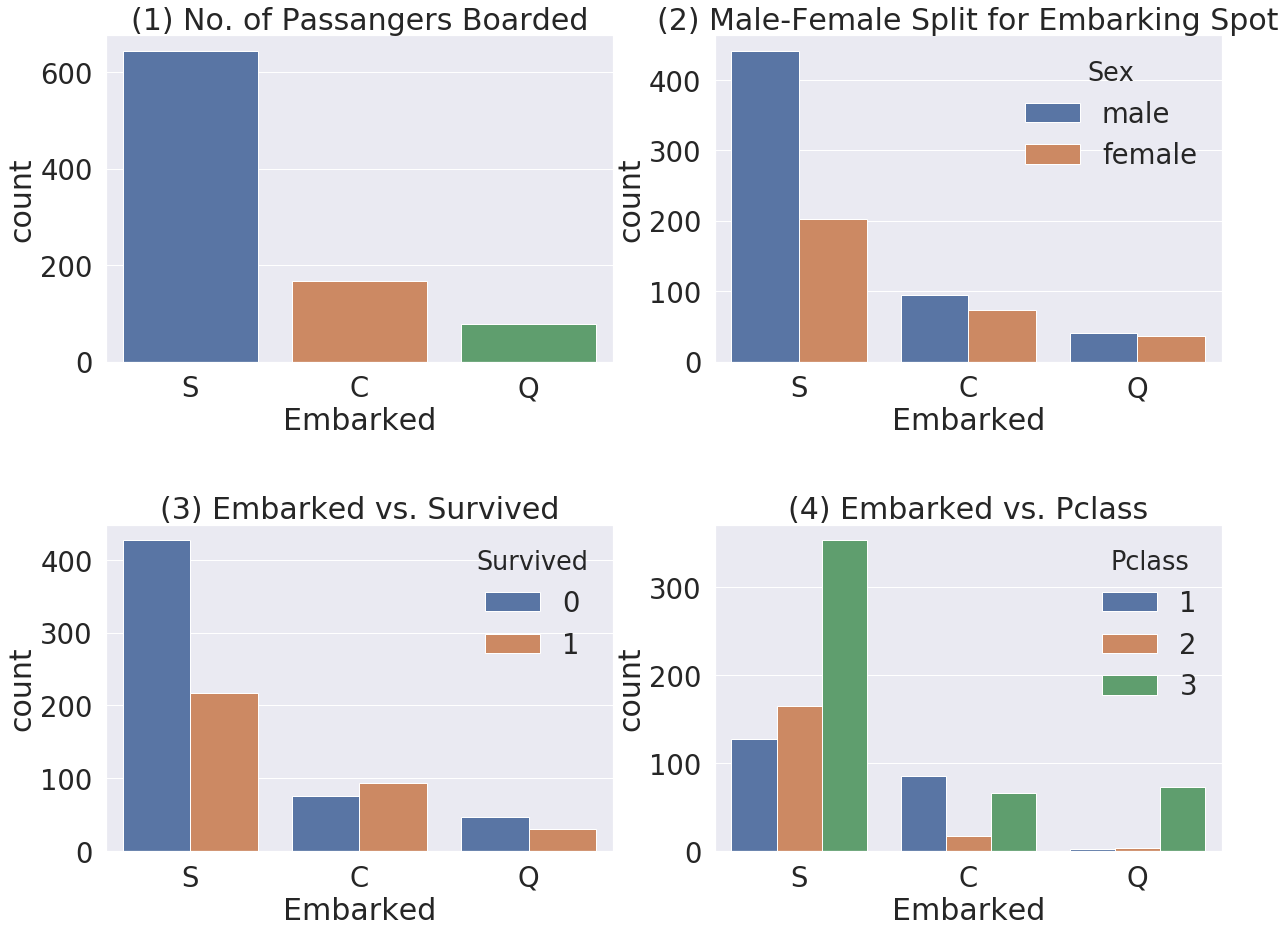

In [39]:
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passangers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarking Spot')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs. Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs. Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Family-Sibling ~Parch Relation

In [0]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1 
#자기 자신을 더해야 하니 1을 더한다.

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] +1

In [41]:
print('Maximum Size of the Family: ', df_train['FamilySize'].max())
print('Minimum Size of the Family: ', df_train['FamilySize'].min())

Maximum Size of the Family:  11
Minimum Size of the Family:  1


In [0]:
# family size~Survival

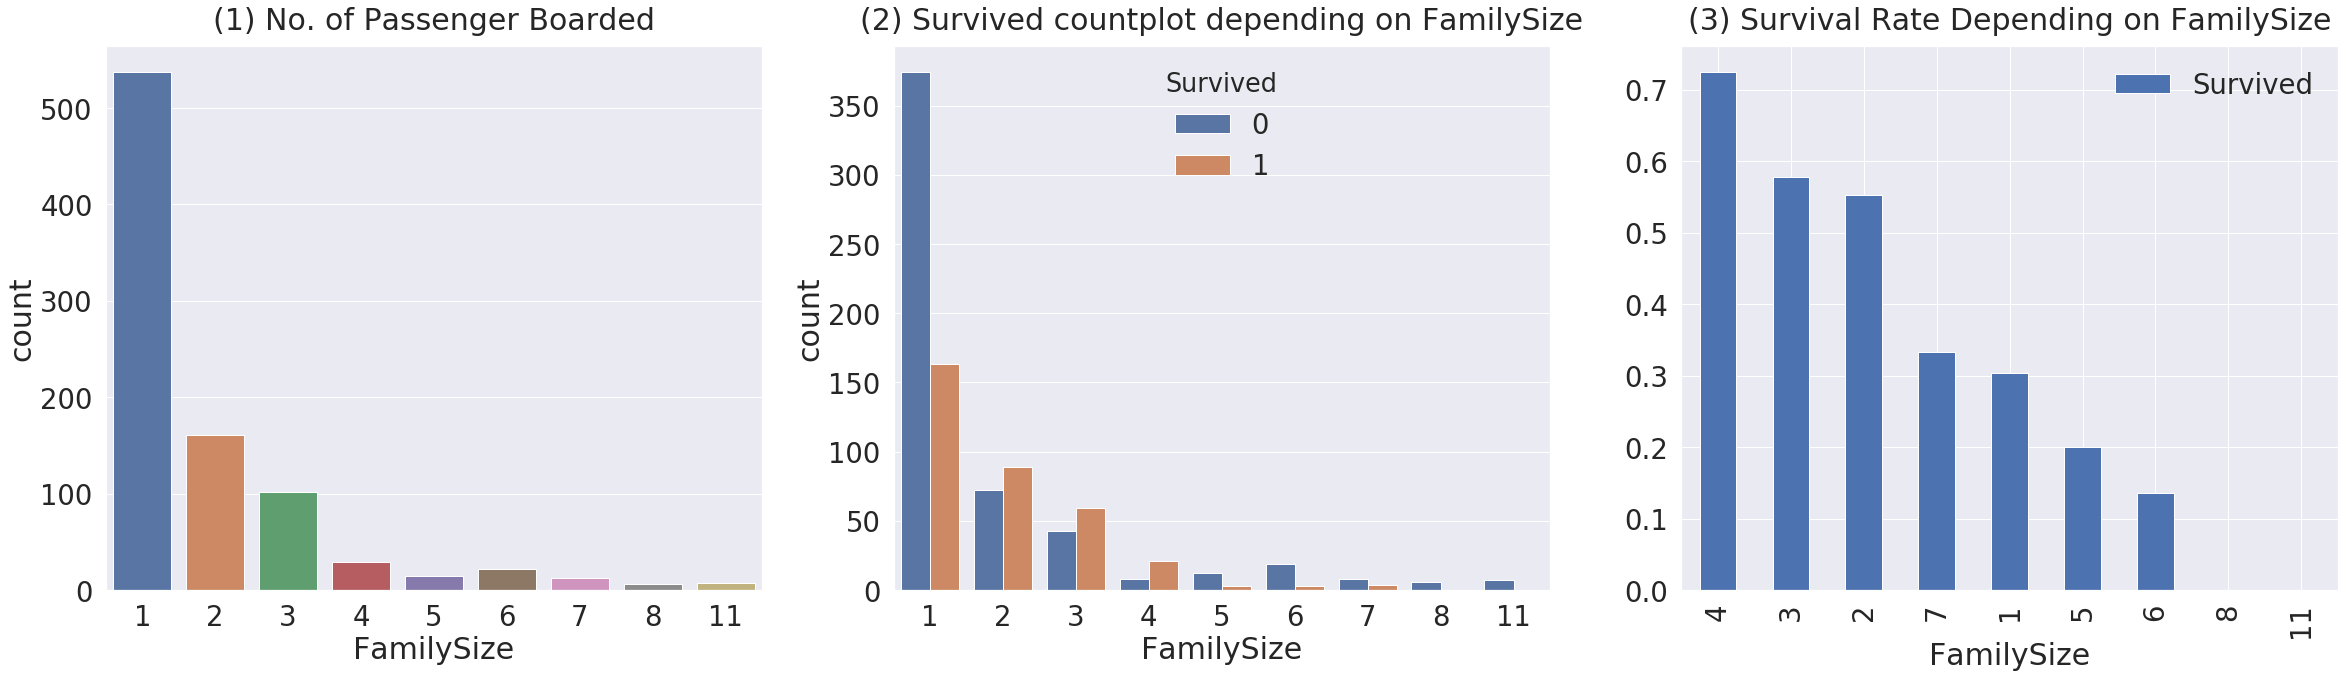

In [43]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survival Rate Depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Fare

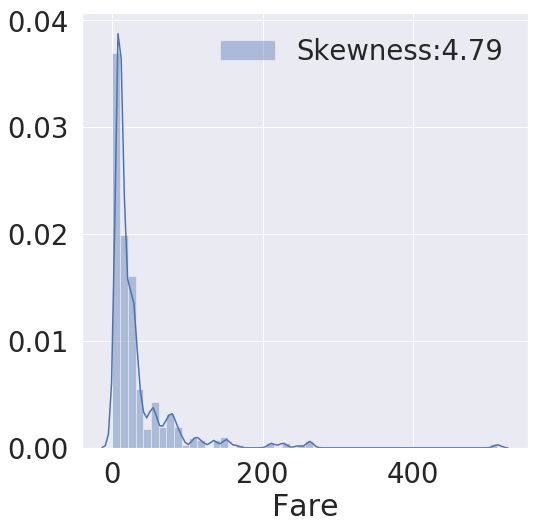

In [44]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g= sns.distplot(df_train['Fare'], color='b', label='Skewness:{:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

In [0]:
# 자료가 너무 비대칭이라 다 log값 처리 할 계획임. 
# python의 lambda 함수 이용 예정

In [0]:
#test set에 있는 nan value를 v평균값으로 치환-
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [0]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i >0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

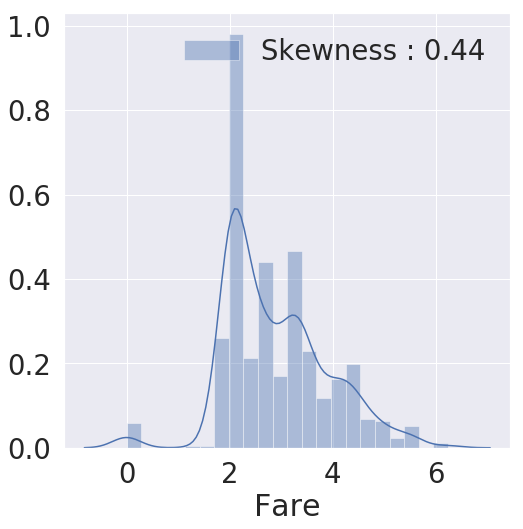

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g=sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g=g.legend(loc='best')

In [0]:
# log 값 취해주니 비대칭성이 많이 사라짐

In [0]:
# Cabin은 결측치가 80%이므로 모델에서 뺄 예정

### Tickets

In [51]:
df_train['Ticket'].value_counts()

347082              7
1601                7
CA. 2343            7
347088              6
CA 2144             6
3101295             6
S.O.C. 14879        5
382652              5
113760              4
2666                4
19950               4
W./C. 6608          4
347077              4
LINE                4
113781              4
PC 17757            4
4133                4
349909              4
17421               4
SC/Paris 2123       3
110152              3
C.A. 31921          3
29106               3
PC 17760            3
PC 17755            3
24160               3
371110              3
230080              3
F.C.C. 13529        3
35273               3
                   ..
382651              1
113788              1
349217              1
A.5. 18509          1
349223              1
28664               1
312993              1
19952               1
36967               1
350052              1
PC 17600            1
35852               1
370369              1
11769               1
A/5 2466  

In [52]:
df_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [53]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

### Feature Engineering
### (null dta 채우기)

In [0]:
## Age null 값 채워주기 (by titles using str method, extract method)

In [0]:
# Salutation 뽑기
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z+])\.')

In [0]:
# Pandas의 corsstab을 이용, Initial과 sex 간의 count를 살펴보기 

In [57]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [59]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


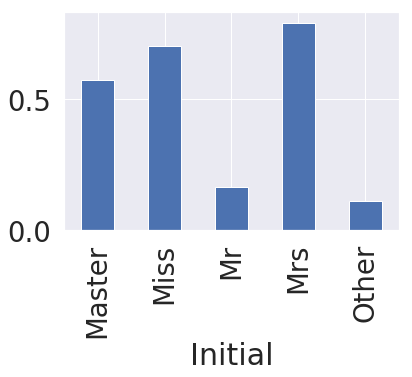

In [60]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [0]:
# Statistics 방식으로 null 값을 채워 줄 예정

In [62]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [0]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial =='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial =='Master'), 'Age'] =5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Other'), 'Age'] = 46


df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [0]:
# Embarked Null값 채워주기 

In [65]:
print('Embarked has', sum(df_train['Embarked'].isnull()), 'Null Values')

Embarked has 2 Null Values


In [0]:
# 2개 밖에 없으니 그냥 가장 많은 탑승구인 S로 채워주어야겠다.

In [0]:
df_train['Embarked'].fillna('S', inplace=True)

In [0]:
# Continous feature 인 Age를 categorical feature로 바꾸어줄 것임

In [0]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] <30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] <40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] <50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] <60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] <70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [0]:
# More smartway of doing above...

def category_age(x):
  if x<10 :
    return 0
  elif x<20:
    return 1
  elif x<30:
    return 2
  elif x<40:
    return 3
  elif x<50:
    return 4
  elif x<60:
    return 5
  elif x<70:
    return 6
  else:
    return 7
  
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [71]:
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True ->', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True -> True


In [0]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace = True)

In [0]:
# Initial, Embarked and Sex (String to Numerical) using map method

In [0]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [0]:
# 위에 것 label encoding과 같은 논리??????

In [0]:
# Embark도 건들어볼까요~_~

In [77]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [78]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [80]:
df_train['Embarked'].isnull().any()

False

In [0]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

In [0]:
# heatmap plot -> 여러 features를 matrix형태로 볼 수 있게 해준다

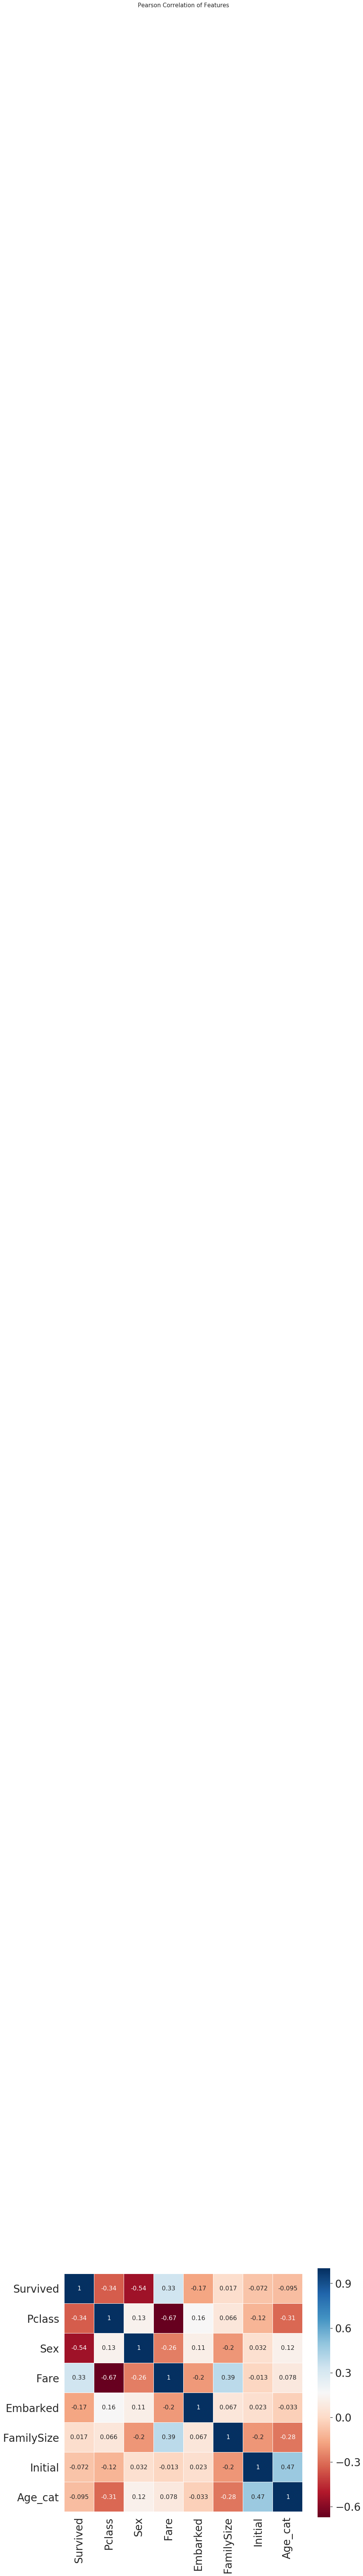

In [83]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=10.5, size=15)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='White', annot=True, annot_kws={'Size':16})

del heatmap_data

In [0]:
# One-hot encoding on Initial & Embarked using get_dummies

In [0]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [86]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0


In [87]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat
0,892,3,"Kelly, Mr. James",1,0,0,330911,2.057860,NaN,1,1,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,1.945910,NaN,2,2,4
2,894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,2.270836,NaN,1,1,6
3,895,3,"Wirz, Mr. Albert",1,0,0,315154,2.159003,NaN,2,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,2.508582,NaN,2,3,2


In [0]:
## Embark에도 one-hot encoding 진행

In [0]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [90]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,1


In [0]:
# drop columns

In [0]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [93]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0.0,Initial_1.0,Initial_2.0,Initial_3.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,1


In [94]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,1,0
1,3,0,1.945910,2,4,0,0,1
2,2,1,2.270836,1,6,0,1,0
3,3,1,2.159003,1,2,0,0,1
4,3,0,2.508582,3,2,0,0,1


In [95]:
list(df_train), list(df_test)

(['Survived',
  'Pclass',
  'Sex',
  'Fare',
  'FamilySize',
  'Age_cat',
  'Initial_0.0',
  'Initial_1.0',
  'Initial_2.0',
  'Initial_3.0',
  'Embarked_0',
  'Embarked_1',
  'Embarked_2'],
 ['Pclass',
  'Sex',
  'Fare',
  'FamilySize',
  'Age_cat',
  'Embarked_0',
  'Embarked_1',
  'Embarked_2'])

In [0]:
# Machine Learning model 만들기 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [0]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [0]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [0]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [103]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 
                                           100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.84% 정확도로 생존을 맞춤


In [104]:
y_vld.shape

(268,)

In [0]:
# Feature Importance를 보쟈 

In [106]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

#위에서 계속 고쳐보려고 했는데 안됨 -> df_test에 initial one-hot encoding이 들어가지 않음;;

ValueError: ignored

In [107]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')

plt.show()

NameError: ignored

<Figure size 576x576 with 0 Axes>